----
# Asignatura: Técnicas avanzadas de análisis de datos
*Grupo*: 6

*Nombres*: Alejandro Faus Atienza, Andrés Ariza Rodríguez, José Boto Pérez, María Fernández Gómez, Rodrigo Valdelvira Ortigosa, Víctor Tamames Rodero

*Actividad*: 2 Convocatoria ordinaria 

----

## 1. MODELO: Light Gradient Boosted Machine (LightGBM) 

Antes de entrar de lleno en el desarrollo de la actividad, es conveniente una breve introducción a los modelos de ensemble para entender la mecánica detrás de estas potentes herramientas y qué aporta **LightGBM** respecto al resto de variantes **Gradiant Boosting Trees**.

### Gradiant Boosting Trees

Estos modelos se basan en en la combinación de varios árboels individuales *(ensemble)* que son entrenandos de forma secuencial y donde cada uno aprende de los errores cometidos por el anterior. La predicción de una nueva obseración se consigue a través de la predicción de todos los árboles.

El problema que presentan los árboles es que aquellos que son poco profundos consiguen menos *varianza* pero por el contrario más *bias* mientras que los más profundos se ajustan mejor a los datos disminuyendo el *bias* pero aumentando la *varianza*. Para alcanzar el equilibrio *bias/varianza* surgen dos tipos de ensembles *bagging* y *boosting*.

- *Bagging*: En esta estrategia cada uno de los árboles se entrena con un subconjunto de datos de entrenamiento diferente *(bootstrapping)*, en la predición final cada uno de los modelos individuales aporta su predicción. Los árboles utilizados tienen muy poca bias pero mucha varianza consiguiendo reducir esta última sin alterar apenas el bias. 

- *Boosting*: Se basa en un conjunto de árboles sencillos llamados *week learnes*, estos árboles tienen varianza alta y bias bajo por lo que la adición secuencial de árboles permite controlar el error final de forma más eficiente (*bias + varianza + $\epsilon$*). Si el número de *week learners* es muy alto puede sufrir *overfitting* a diferencia de *bagging* y *RandomForest* por lo que es clave ajustar correctamente el hiperparámetros *learning rate* que posteriormente se describirá.


Para ambas estrategias la predicción final se consigue como la media de las prediciones de cada árbol *(variables continuas)* o como la más frecuente *(variables discretas)*.

### Mecanismo iterativo de Gradiant Boosting 

*Gradient Boosting* es una generalización del algoritmo [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost) *(Adaptive Boosting)* que en 1995 marcó un hito en el aprendizaje estadístico.

La flexibilidad que presenta este algoritmo ha hecho posible aplicar boosting a multitud de problemas (regresión, clasificación múltiple...), todo esto lo ha convertido en uno de los métodos de machine learning de mayor éxito. 

Como se ha comentado en el apartado anterior, la premisa de esta implementación consiste en un agregado de varios modelos individuales que secuencialmente ajustan el residuo del árbol anterior M veces.

Se ajusta un primer weak learner  **$f_1$**  con el que se predice la variable respuesta   **$y$** , y se calculan los residuos  **$y−f_1(x)$** . A continuación, se ajusta un nuevo modelo  **$f_2$** , que intenta predecir los residuos del modelo anterior, en otras palabras, trata de corregir los errores que ha hecho el modelo  **$f_1$** .

$$ f_1(x)\approx y $$
$$ f_2(x)\approx y - f_1(x)$$

En la siguiente iteración, se calculan los residuos de los dos modelos de forma conjunta  **$y−f_1(x)−f_2(x)$** , los errores cometidos por  **$f_1$**  y que  **$f_2$**  no ha sido capaz de corregir, y se ajusta un tercer modelo  **$f_3$**  para tratar de corregirlos.

$$ f_3(x)\approx y -f_1(x)-f_2(x)$$

Para evitar overfitting se utiliza un parámetro de regularización, conocido como learning rate **($λ$)**, que limite la influencia de cada modelo en el conjunto del ensemble. Como consecuencia de esta regularización, se necesitan más modelos para formar el ensemble pero se consiguen mejores resultados (Este parámetro no se aprende en durante el entrenamiento por lo que debe ser ajustado a priori como hiperparámetro)

$$ f_1(x)\approx y $$
$$ f_2(x)\approx y-\lambda f_1(x) $$
$$ f_3(x)\approx y-\lambda f_1(x)- \lambda f_2(x) $$
$$y \approx \lambda f_1(x)+\lambda f_2(x)+ \lambda f_3(x)+...+\lambda f_m(x)$$

### Ventajas de LightGBM:  Binning

Para reducir la búsqueda de puntos de corte *(thresholds)* que es uno de los principales problemas de *Gradient Boosting* hay que iterar sobre todos los valores observaods lo que tiene un alto coste computacional. 

Mediante binning, se minimiza este problema discretizando de forma homogenea generalmente a través de sus cuantiles. Por el contrario, se pierde información al considerarse como umbrales los límites de cada bin.

Esta optimización respecto a la implementación original *GradientBoosting* de *scikit-learn* es incoporada en los modelos *XGBoost, LightGBM, H2O y HistGradientBoosting*.

### Otras ventajas

Desde el punto de vista computacional *LightGBM* también aporta las siguientes ventajas con *scikit-learn*.

- Permite que las observaciones incluyan valores missing
- Permite el uso de GPUs
- Entrenamiento paralelizado (paraleliza algunas partes del algoritmo)
- Permite restricciones monotónicas
- Permite trabajar sobre matrices sparse
- No es necesario one-hot-encoding de variables categóricas

## 2. Selección del conjunto de datos

El dataset ha sido extraído de Kaggel y representa las características fisicoquímicas del vino tinto portugués *Vinho Verde* a lo largo de 1599 variantes. ['wineQuality'](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)


1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality (score within 0 and 10)

## 3. Planteamiento del problema a resolver

Para resolver la actividad supondremos que se nos ha reclutado
como científicos de datos por el **Consejo Regulador Denominación Origen Calificada Rioja**, el cual es el organismo encargado de velar por la calidad y buen hacer en la elaboración del vino con DOR. Debido a que los caldos portugueses representan un serio competidor, quieren que elaboremos un algoritmo capaz de aplicar los mismos criterios de calidad que nuestros vecinos para estimar en qué rango se encuentran los vinos homólogos riojanos de acuerdo a dicho criterio.

## 4. Preparación del entorno

In [ ]:
# PREPARACIÓN DEL ENTORNO
# ================================================================

# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import sklearn

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # imprimimos en pantalla el resultado de todos los statements

In [ ]:
feature_names = ['id', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
raw = pd.read_csv('wineQualityReds.csv', header=0, names = feature_names)

## 5. Análisis exploratorio EDA (Exploratory Data Analysis)

In [ ]:
# VISUALIZACIÓN PRELIMINAR
# ================================================================

# Mostramos por pantalla los primeros cinco elementos del dataset para obtener una visualización preliminar. 
raw.head()

,id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# NÚMERO DE OBSERVACIONES Y TIPO DE DATOS
# ================================================================

# Reemplazamos cualquier valor anómalo representado por '?' con 'NaN'.
raw.replace("?", np.nan, inplace = True)

# Función para calcular el porcentaje de elementos 'NaN' y visualizar el tipo de datos.
def missing_data(df):
    total   =  df.isnull().sum()
    percent = (df.isnull().sum()/df.count()*100).round(3)
    df_missing_data = pd.DataFrame(({'NaN': total, '%': percent, 'types': df.dtypes}))
    return df_missing_data

In [ ]:
# Aplicamos la función al dataset e imprimimos su dimensión.
missing_data(raw)
raw.shape

,NaN,%,types
id,0,0.0,int64
fixed_acidity,0,0.0,float64
volatile_acidity,0,0.0,float64
citric_acid,0,0.0,float64
residual_sugar,0,0.0,float64
chlorides,0,0.0,float64
free_sulfur_dioxide,0,0.0,float64
total_sulfur_dioxide,0,0.0,float64
density,0,0.0,float64
pH,0,0.0,float64


(1599, 13)

Composición del dataset:
- *Variables*: Existen un total de 1599 observaciones y 13 variables 
- *Tipo de datos*: Todas las variables son numéricas y de tipo float64 o int64
- *Datos faltantes*: No hay observaciones incompletas 

In [ ]:
# ANÁLISIS DESCRIPTIVO DE LOS DATOS
# ================================================================

raw.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id,1599.0,800.00,461.74,1.00,400.50,800.00,1199.50,1599.00
fixed_acidity,1599.0,8.32,1.74,4.60,7.10,7.90,9.20,15.90
volatile_acidity,1599.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric_acid,1599.0,0.27,0.19,0.00,0.09,0.26,0.42,1.00
residual_sugar,1599.0,2.54,1.41,0.90,1.90,2.20,2.60,15.50
chlorides,1599.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free_sulfur_dioxide,1599.0,15.87,10.46,1.00,7.00,14.00,21.00,72.00
total_sulfur_dioxide,1599.0,46.47,32.90,6.00,22.00,38.00,62.00,289.00
density,1599.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,1599.0,3.31,0.15,2.74,3.21,3.31,3.40,4.01


In [ ]:
# VALORES ÚNICOS
# =============================================================================================================

# Calculamos el número de valores únicos de cada variable
pd.DataFrame({'feature_names': raw.columns,  'unique_values': (len(raw[k].unique()) for k in raw.columns)}) \
  .sort_values('unique_values', ascending=False) 

,feature_names,unique_values
0,id,1599
8,density,436
5,chlorides,153
7,total_sulfur_dioxide,144
2,volatile_acidity,143
1,fixed_acidity,96
10,sulphates,96
4,residual_sugar,91
9,pH,89
3,citric_acid,80


In [ ]:
raw['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

Se observa que todas las variables a excepción de `id` podrían considerarse discretas ordinales ya que recorren rangos de valores concretos. Cabe destacar que este patrón también lo sigue la variable `quality` que es nuestra característica objetivo, además, no incluye valores por encima de 8 ni por debajo de 3 lo que nos impedirá tener datos precisos de valoraciones en el rango 0-10 que promete la documentación.

In [ ]:
# COPIA DE DATOS
# ================================================================

# Copiamos el dataset original y eliminamos 'id' pusto que es un identificador único para cada observación y no aporta valor
data = raw.drop('id', axis=1)

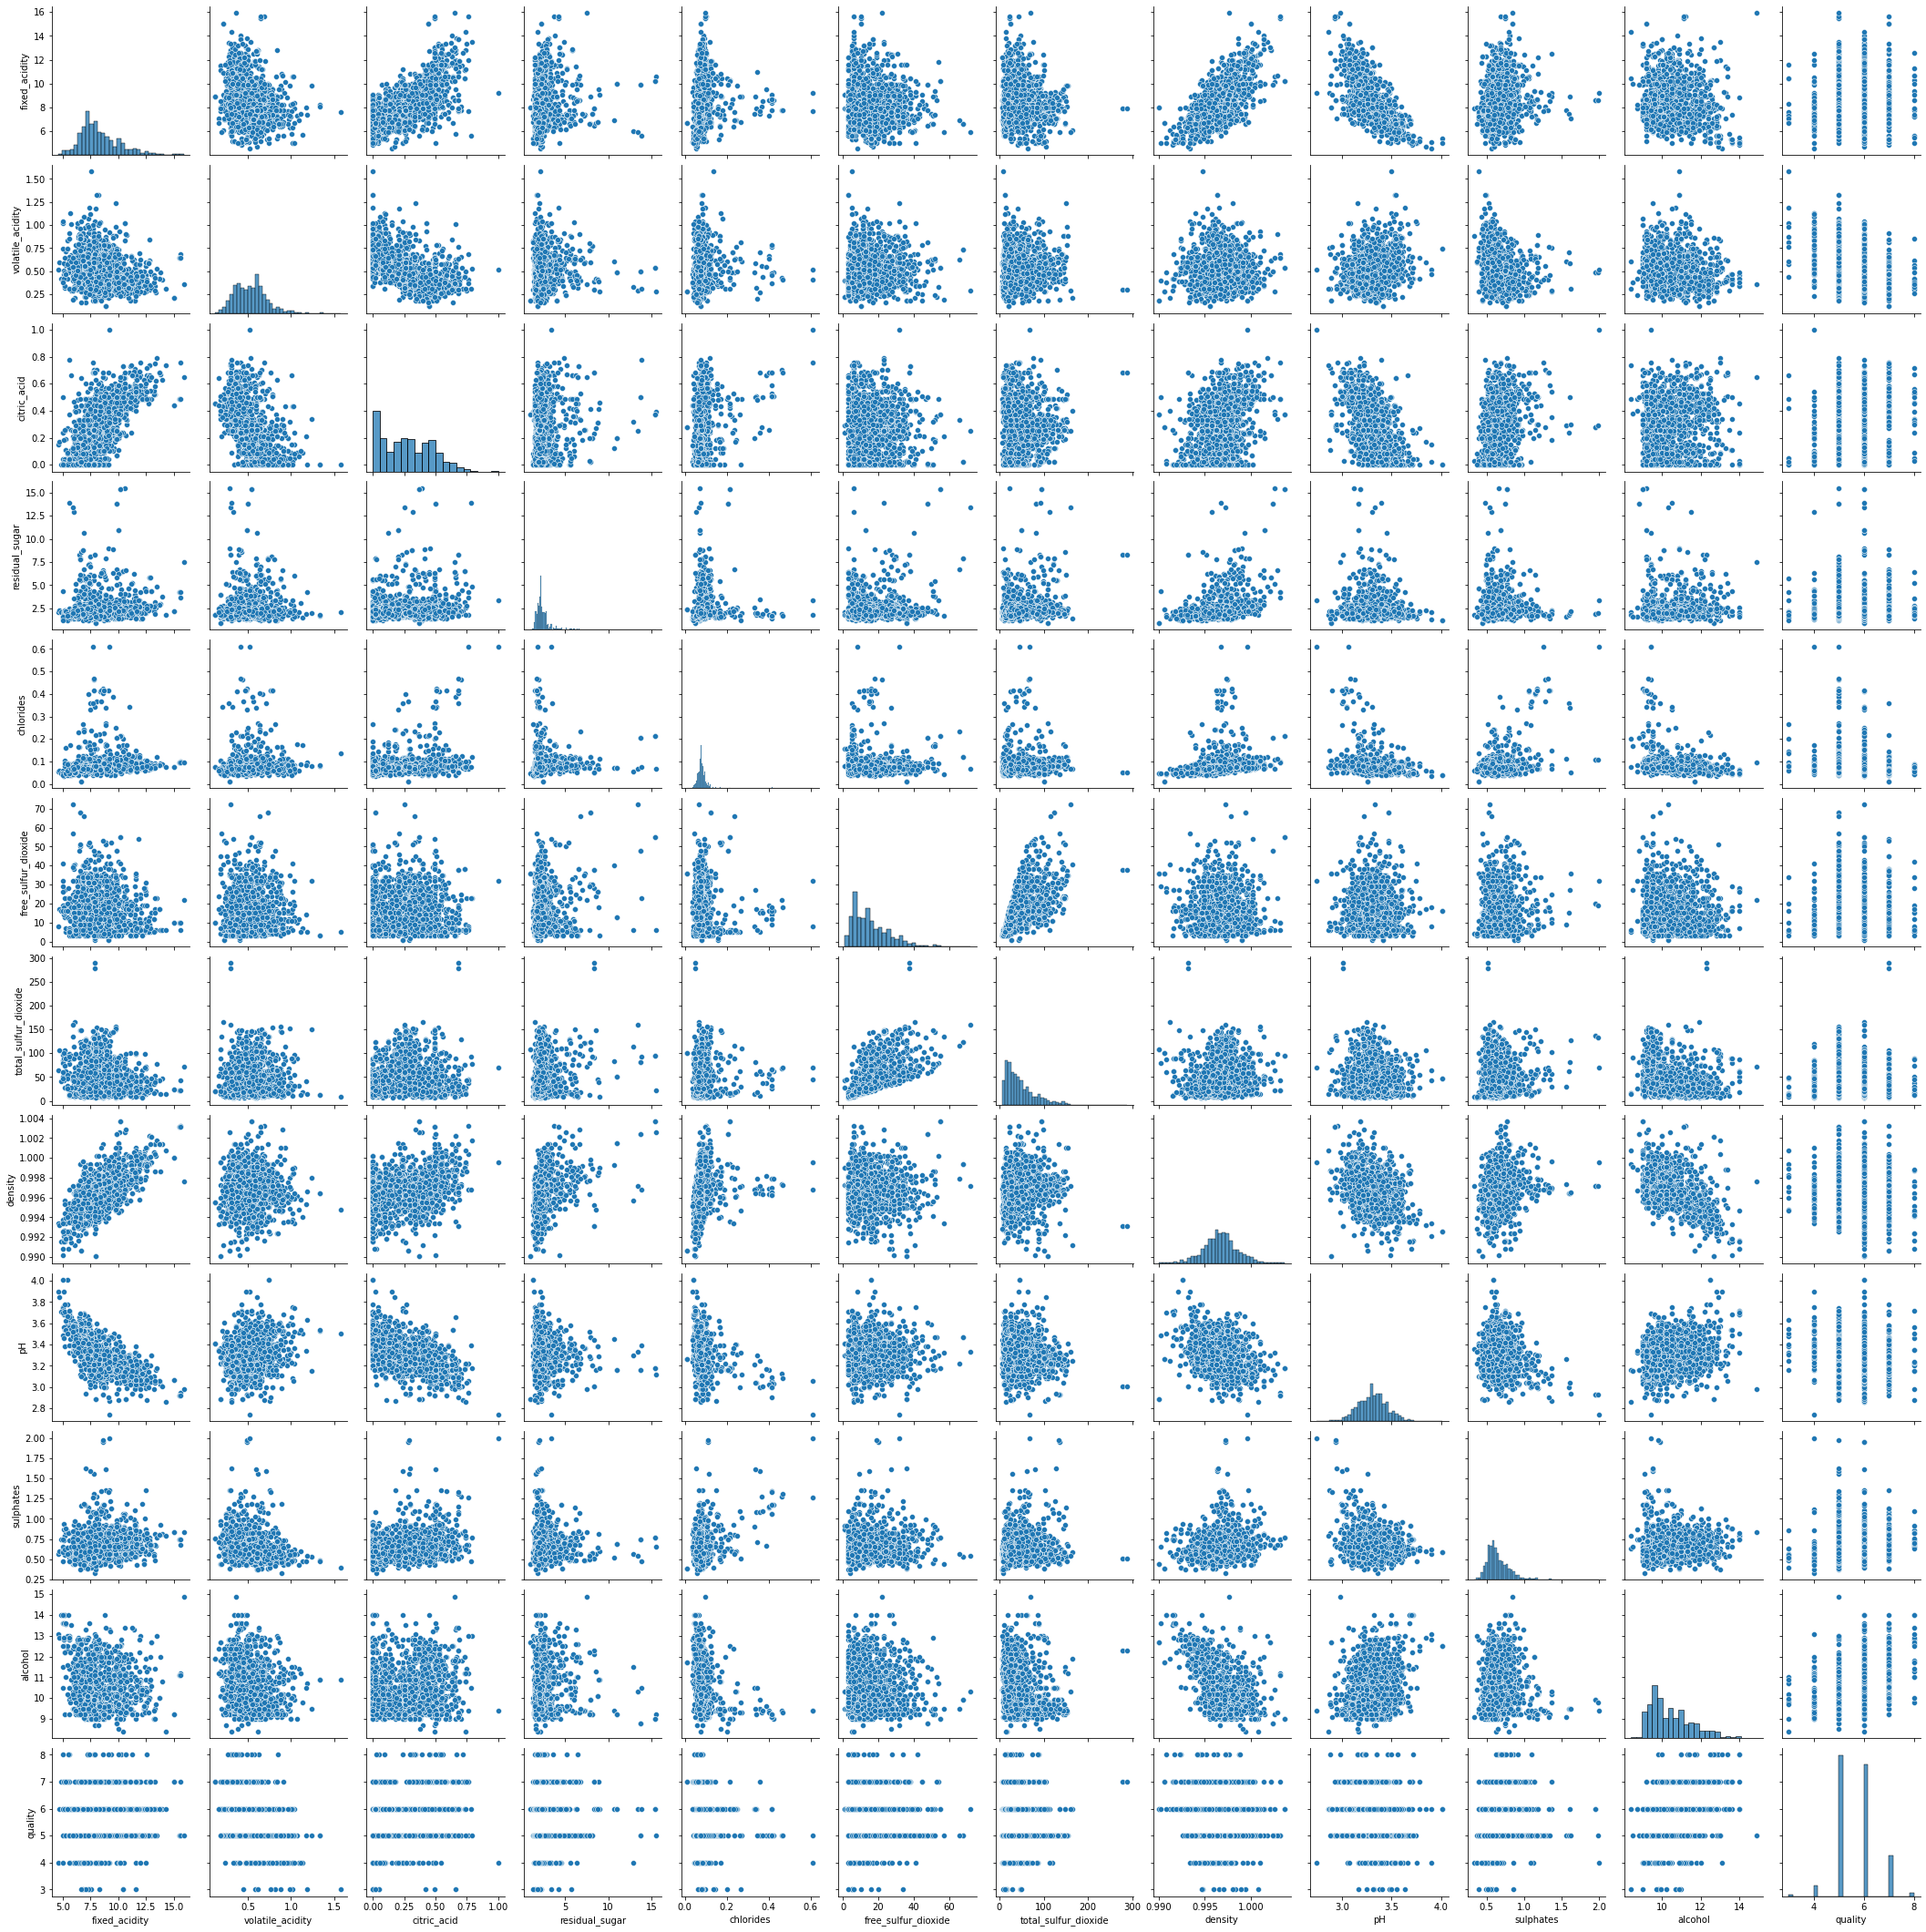

In [ ]:
# REPRESENTACIÓN BIDIMENSIONAL
# ================================================================

# Representación por parejas de todas las característias que nos permitirá entender mejor sus relaciones.
sns.pairplot(data);

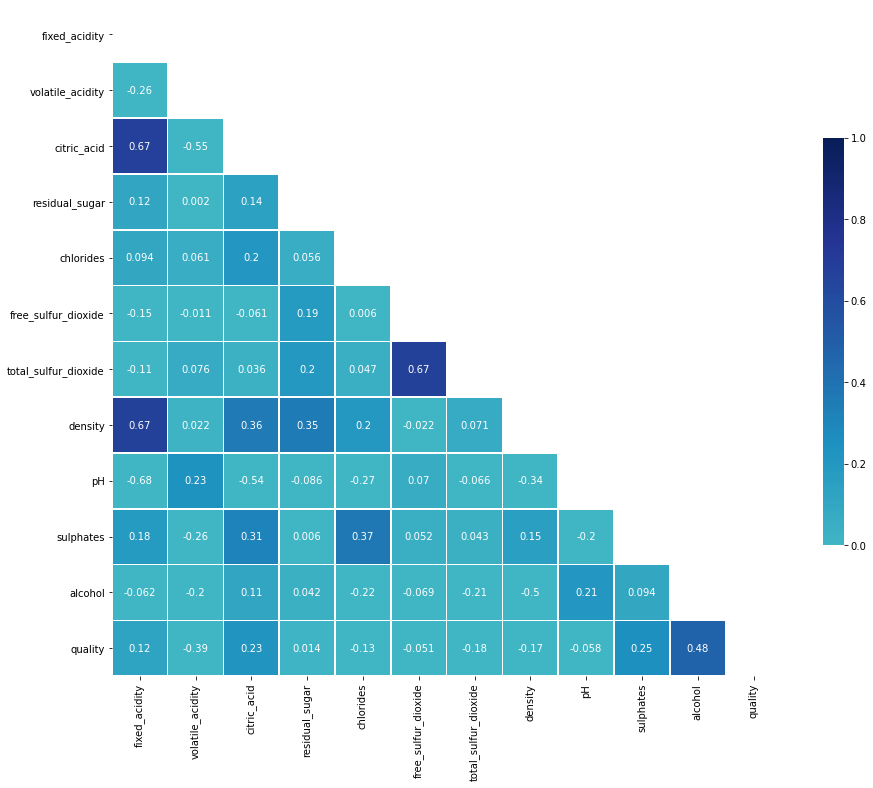

In [ ]:
# COEFICIENTES DE CORRELACIÓN
# ================================================================

# Representación del coeficiente de correlación lineal de Pearson que independientemente de la escala muestra el grado de linealidad entre variables
# corr = 1 o -1: correlación perfecta, corr = 0 ausencia de corrleación.
# El cálculo se ha realizado en valor absoluto para anular las simetrías detectadas anteriormente. 

corr = np.abs(data).corr().round(3)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(corr, mask=mask, cmap="YlGnBu", vmin = 0.0, vmax=1.0, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

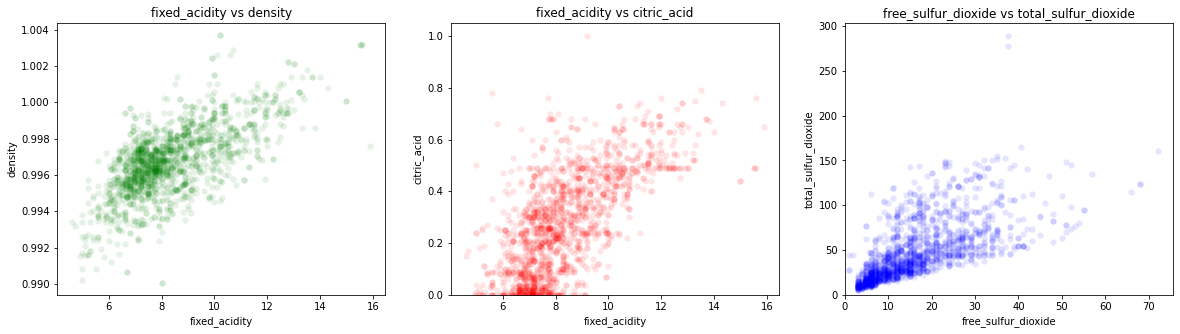

In [ ]:
# CORRELACIONES MÁS SIGNIFICATIVAS
# ================================================================

plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.scatter(x="fixed_acidity", y="density", data=data, color='g', alpha=0.1, linewidth=0.1)
plt.xlabel("fixed_acidity")
plt.ylabel("density")
plt.title("fixed_acidity vs density")

plt.subplot(132)
plt.scatter(x="fixed_acidity", y="citric_acid", data=data, color='r', alpha=0.1, linewidth=0.1)
plt.ylim(0,)
plt.xlabel("fixed_acidity")
plt.ylabel("citric_acid")
plt.title("fixed_acidity vs citric_acid")

plt.subplot(133)
plt.scatter(x="free_sulfur_dioxide", y="total_sulfur_dioxide", data=data, color='b', alpha=0.1, linewidth=0.1)
plt.xlabel("free_sulfur_dioxide")
plt.ylabel("total_sulfur_dioxide")
plt.title("free_sulfur_dioxide vs total_sulfur_dioxide")
plt.xlim(0,)
plt.ylim(0,);

Destacan las correlaciones graficadas en la celda superior, posteriormente analizaremos si pudiéramos prescindir de alguna de ellas por el hecho de ser redundante.
- `fixed_acidity` vs `density`, correlación: 0.67
- `fixed_acidity` vs `density`, correlación: 0.67
- `free_sultur_dioxide` vs `total_sulfur_dioxide`, Correlación: 0.67

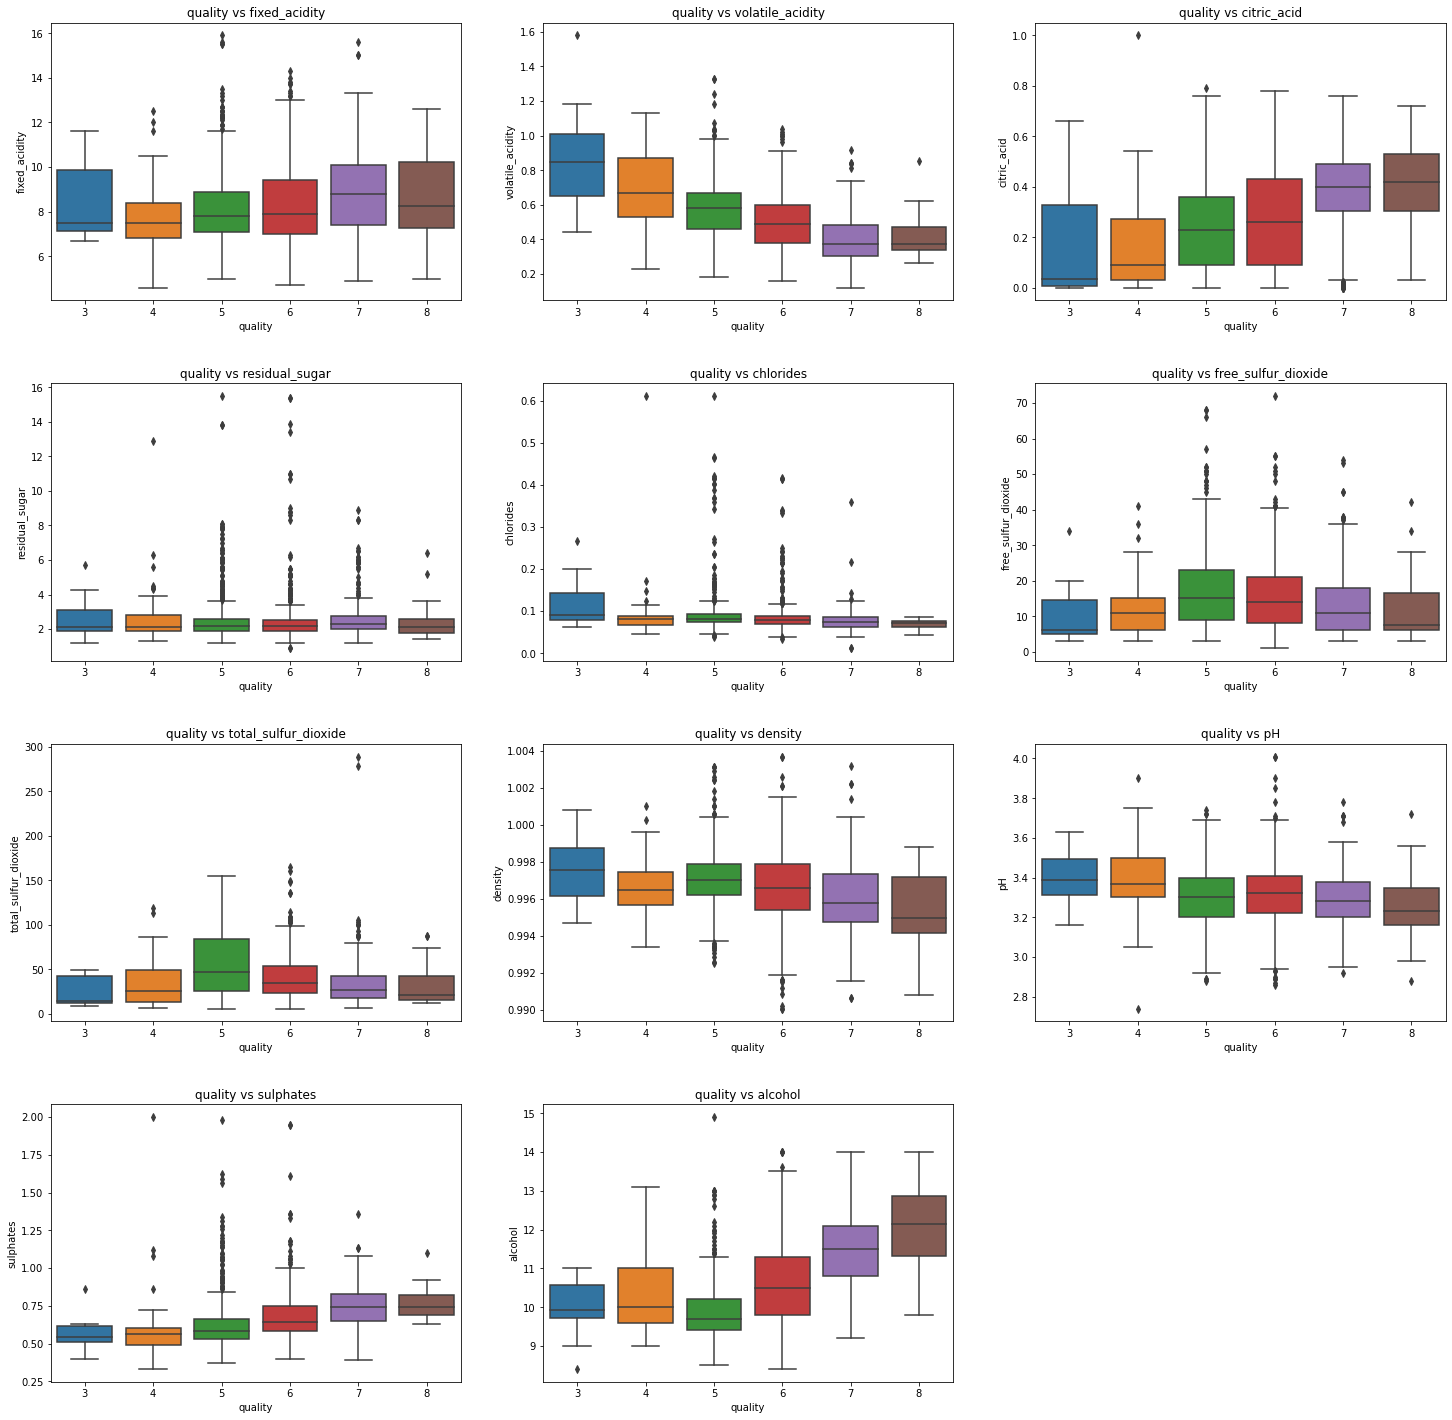

In [ ]:
# QUALITY vs VARIABLES NUMÉRICAS
# ================================================================

n_rows = 4
n_cols = 3

plt.figure(figsize=(25, 25))
for i in range(1,12):
    plt.subplot(n_rows, n_cols, i)

    sns.boxplot(x="quality", y= feature_names[i], data=raw)
    plt.title(f'quality vs {feature_names[i]}')
  
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show();

Las variables con mayor impacto sobre la calidad son:
- Valores más elevados de `volatil_acidity` obtienen las peores puntuacioens 3-4.
- Valores más elevados de `citric_acid` obtienen las puntuaciones más elevadas 7-8.
- Cuanto mayor es la concentración de `alcohol` mayor es la puntuación 7-8.
- La concentración de `sulphates` mejora la calidad 7-8.

En menor medida:
- Mayor `density` tiende a empeorar la calidad.
- Mayor `pH` empeora la calidad 3-4.

## 6. Agregación de nuevas variables

Puede resultar apropiado añadir una variables categórica llamada `ranking` que aporte algo más de información a la calidad del vino clasificándolos de acuerdo a calidad baja, media o alta.

In [ ]:
# VARIABLE RANKING
# ================================================================

# Función que asocia la calidad con la clasificación
def ranking (score):
    if score <=5:
        return 'low'
    elif 6.5 >= score > 5: 
        return 'medium'
    else:
        return 'high'

# añadidomos la variable al dataset
data['ranking'] = data['quality'].apply(lambda x: ranking (x))
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,ranking
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low


## 7. Modelizado
### 7.1 Preparación del modelo y observaciones

Tras el análisis inicial se observa que a pesar de que la documentación afirma que la calidad recorre el rango *(0-10)* vemos que en el dataset tan solo aparecen valores discretos en el rango *(3-8)* lo que nos limita la labor predictiva, por ello podríamos hacer lo siguiente:
- **Clasificación**: Recogería valores discretos entre *(3-8)* por lo que nunca obtendríamos puntuacioens superiores o inferiores a ese rango.
- **Regresión**: Obtendríamos valores continuos aunque no quedaría claro que ocurriría con calificaciones fuera del rango, tanto por encima  de 8 como por debajo de 3, además, deberíamos tener la precaución de encontrar un modelo que permitiera recoger la peculiadad de que el rango de calidad es *(0-10)*.

En cualquier caso convendría que el Consejo Regulador aclarara estos puntos y nos proporcionara vinos que abarcaran la mayor cantidad de calificaciones posibles.

En nuestro caso optaremos por un modelo de regresión supervisado (conocemos la clasificación de las características) que aportará valores continuos, en caso de conseguir más observacioens el modelo se reentrenaría para generar predicciones más precisas.

La métrica de referencia para los siguientes modelos será RMSE puesto que representa el error en las unidades de la variable objetivo, en este caso `quality`
> $RMSE$: Raiz del error cuadrático medio: $RMSE = \sqrt{\frac{1}{N} \sum_{n=1}^N(y-\hat y)^2}$;   $y$ valores a predecir;  $\hat y$ valores predichos.

In [ ]:
# CREACIÓN DE VARIABLES DUMMY
# =================================================================================================================

# Transformamos la variable categórica 'ranking' anteriormente creada para que pueda ser procesada por el algoritmo
# Las variables 'dummy' otorgan una columma nueva por característica con codificación binaria.

dummy      = pd.get_dummies(data['ranking'])
data_prep  = pd.concat([data, dummy], axis=1) \
               .drop('ranking', axis=1)
data_prep

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,high,low,medium
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,1,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,1,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,1,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,0,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0,1,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0,0,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0,0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0,1,0


In [ ]:
# DIVISIÓN DEL DATASET
# ==============================================================================

# Importamos la función que nos permitirá dividir nuestros datos en train & test.
from sklearn.model_selection import train_test_split

# Separamos los datos X: Matriz de variables independientes, y: variable objetivo. 
X = data_prep.drop(['quality'], axis = 1) 
y = data_prep['quality']

# Separamos el dataset reservando un 20% de los elementos para comprobar el modelo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

### 7.2 LGBMRegressor

Primero entrenamos el modelo con los parámetros definidos por defecto por los desarrolladores de [LGBMRegressor](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html). 

In [ ]:
# DEFINICIÓN DEL MODELO
# ================================================================
from lightgbm.sklearn import LGBMRegressor

# Instanciamos el modelo.
LGBMR = LGBMRegressor(random_state = 123)

# Calculamos el modelo con los datos de entrenamiento.
LGBMR.fit(X_train, y_train)

LGBMRegressor(random_state=123)

In [ ]:
# CÁLCULO DE MÉTRICAS
# ================================================================

# Importamos la métrica a utilizar
from sklearn.metrics import mean_squared_error

# Predicción train & test
y_pred_train = LGBMR.predict(X_train)
y_pred_test  = LGBMR.predict(X_test)

# Raiz del Error cuadrático medio train & test: 'RMSE'
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test  = mean_squared_error(y_test, y_pred_test,   squared=False)

# 'RMSE'
print(f"Métrica RMSE en entrenamiento: {rmse_train:.4f}")
print(f"Métrica RMSE en test         : {rmse_test:.4f} \n")

Métrica RMSE en entrenamiento: 0.1112
Métrica RMSE en test         : 0.2208 



Los errores tanto en el entrenamiento como en el test son muy próximos a cero pero insuficiente como para evaluar la eficiencia del modelo, además, se advierte sobreajuste porque el error en el dataset de prueba es el doble del de entrenamiento.

### 7.3 Sensibilidad al escalado de variables

Para comprobar la sensibilidad en el escalado de las variables multiplicaremos los estimadores por un factor aleatorio controlado por una *seed* y compararemos los valores de la métrica (!)$R^2$ en nuestro modelo base *LGBMRegressor* y el regresor *ElasticNet*.
- (!) Ambos modelos usan el método .score() para esta métrica.

In [ ]:
# SENSIBILIDAD A LA ESCALA DE LAS VARIABLES
# ================================================================

# Importamos el modelo ElasticNet para poder comparar los resultados.
from sklearn.linear_model import ElasticNet

# Función de evaluación
def train_algo(seed, model):
    np.random.seed(seed=seed)                         # Fijamos el estado del generador de números aleatorios.
    scale_factors = np.random.rand(X_train.shape[1])  # Factores de escalado para cada variable.
    X_train_scaled = X_train*scale_factors            # Escalado mediante la multiplicación de los factores.
        
    if model == "LGBMRegressor":
        est = LGBMRegressor(random_state = 123)      
    elif model == "ElasticNet":
        est = ElasticNet(alpha=1, l1_ratio=0.5, max_iter=3000)

    est.fit(X_train_scaled, y_train)
    r2_train = est.score(X_train_scaled, y_train)
    print(f"Métrica R2 en entrenamiento: {r2_train}")

# Importamos los Widgets adecuados    
from ipywidgets import interact, interactive 
import ipywidgets as widgets

widget_seed = widgets.IntSlider(min=0, max=100, step=1, value=32, continuous_update=False, description='Semilla:')
widget_model = widgets.Dropdown(value='LGBMRegressor', placeholder='Elige algoritmo',
    options =['LGBMRegressor', 'ElasticNet'],
    description='Algoritmo:',
    ensure_option=True,
    disabled=False
)

print("""A continuación se muestran varios controles interactivos:
- "Semilla": variando este parámetro se consiguen generar diferentes escalados aleatorios de las variables
- "Algoritmo": permite seleccionar el algoritmo sobre el que evaluar la invariancia a la escala""")
interact(train_algo, model=widget_model, seed=widget_seed);

A continuación se muestran varios controles interactivos:
- "Semilla": variando este parámetro se consiguen generar diferentes escalados aleatorios de las variables
- "Algoritmo": permite seleccionar el algoritmo sobre el que evaluar la invariancia a la escala


interactive(children=(IntSlider(value=32, continuous_update=False, description='Semilla:'), Dropdown(descripti…


Se aprecia que el modelo *LGBMRegressor* no varía con la escala mientras que *ElasticNet* como era de esperar sí, debido a la sensibilidad de los parámetros de regularización, en este caso $\lambda$ y $\alpha$.


### 7.4 Cálculo de hiperparámetros

De entre todos los parámetros cabe prestar atención a aquellos que controlan el crecimiento del árbol, velocidad de aprendizaje del modelo y los que gestionan la parada temprana. Para encontrar los parámetros óptimos utilizaremos [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

- *num_leaves*: Por lo general $2^{max-depth}$.
- *n_estimators*: Número de árboles incluidos en el modelo.
- *max_depth*: Profundidad máxima que pueden alcanzar los árboles.  
- *subsample*: Proporción de observaciones utilizadas para el ajsute de cada árbol. Si su valor es inferior a 1, se está aplicando Stochastic Gradient Boosting.
- *learning_rate*: Reduce la contribución de cada árbol multiplicando su influencia original por este valor. 
- *boosting_type*: ‘gbdt’, Gradient Boosting Decision Tree (por defecto). 

In [ ]:
# GridSearchCV
# ==============================================================================
# Importamos las librerías necesarias
# ==============================================================================

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold # Validador del modelo
import multiprocessing

# Definición de la 'rejilla' de hipeparámetros a analizar
# ==============================================================================
param_grid = {
              'num_leaves'       : [2, 8, 32, 1024], # max_depth^2
              'n_estimators'     : [100, 500, 1000],
              'max_depth'        : [-1, 1, 3, 5, 10],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.001, 0.01, 0.1],
              'boosting_type'    : ['gbdt']
             }

# Definición del modelo
# ==============================================================================
grid = GridSearchCV(
        estimator  = LGBMRegressor(random_state=123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

# Entrenamos el modelo
# =============================================================================
grid.fit(X_train, y_train);

In [ ]:
# RESULTADOS
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .round(4) \
    .head(4) 

,param_boosting_type,param_learning_rate,param_max_depth,param_n_estimators,param_num_leaves,param_subsample,mean_test_score,mean_train_score
180,gbdt,0.01,3,500,32,0.5,-0.2477,-0.2124
178,gbdt,0.01,3,500,8,0.5,-0.2477,-0.2124
179,gbdt,0.01,3,500,8,1,-0.2477,-0.2124
181,gbdt,0.01,3,500,32,1,-0.2477,-0.2124


In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================

print(grid.best_params_, ":", grid.best_score_, grid.scoring)

{'boosting_type': 'gbdt', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'num_leaves': 8, 'subsample': 0.5} : -0.24770310815733917 neg_root_mean_squared_error


In [ ]:
# METRICAS 
# ==============================================================================

from sklearn.metrics import mean_squared_error

# Predicción train & test
modelo_final = grid.best_estimator_
y_pred_train = modelo_final.predict(X_train)
y_pred_test  = modelo_final.predict(X_test)

# Raiz del error cuadrático medio train & test: 'RMSE'
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test  = mean_squared_error(y_test, y_pred_test,   squared=False)

# 'RMSE'
print(f"Métrica RMSE en entrenamiento: {rmse_train:.4f}")
print(f"Métrica RMSE en test         : {rmse_test:.4f} \n")

Métrica RMSE en entrenamiento: 0.2147
Métrica RMSE en test         : 0.2172 



Respecto al modelo anterio parece haber desaparecido el problema de sobreajuste, veremos posteriormente mediante *Cross Validation* si esto es así.

**REPRESENTACIÓN DE HIPERPARÁMETROS**

Puede resultar útil representar los hiperparámetros para entender su evolución respecto a la métrica de referencia. En este caso la rejilla de hiperparámetros es extensa y resulta un tanto complicado graficarlos individualmente ya que cada valor es permutado con el resto, por tanto, la estrategia elegida será la de agruparlos de acuerdo al mínimo del conjunto de permutaciones para cada valor del hiperparámetro.

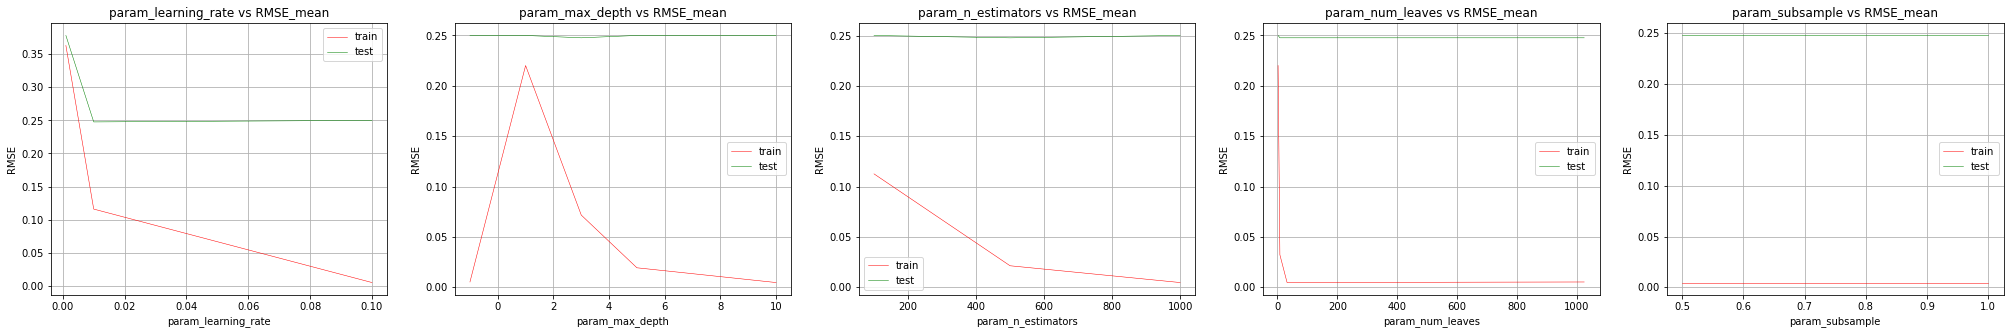

In [ ]:
# HIPERPARÁMETROS vs RMSE_mean
# ==============================================================================

n_rows = 1
n_cols = 5

parameters = ['param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_num_leaves', 'param_subsample']
plt.figure(figsize=(35, 5))

for i in range(0,n_cols):
    index = n_rows*100+n_cols*10+i+1
    ax = plt.subplot(index)
    resultados.groupby(parameters[i])['mean_train_score'].max().abs().plot(ax = ax, color='r', linewidth=0.5, grid=True, label='train')
    resultados.groupby(parameters[i])['mean_test_score'].max().abs().plot( ax = ax, color='g', linewidth=0.5, grid=True, label='test')
    ax.set_title(f'{parameters[i]} vs RMSE_mean')
    ax.set_ylabel('RMSE')
    ax.legend()

plt.subplots_adjust(wspace=0.2, hspace=0.3);

Observamos que la tendencia de todas las curvas es bastante acentuada por el bajo número de valores probados por hiperparámetro (debido al alto coste computacional), no obstante, nos da una idea de los rangos en los que podemos focalizarnos y hacer una búsqueda exhaustiva de acuerdo al siguiente criterio:
- `learning_rate` > 0.01
- `n_estimators` > 500

También se observa en la diferencia entre los valores train/test un ligero sobreajuste.

### 7.5 Cross Validation

Par eliminar la incertidumbre introducida por la técnica *hold out*, utilizar validación cruzda [cross validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) nos permitirá entrenar el modelo en diferentes *folds* *train & validation*.

In [ ]:
# CROSS VALIDATE
# ==============================================================================

from sklearn.model_selection import cross_validate

scoring = ['neg_root_mean_squared_error']
cv_scores = cross_validate(modelo_final, X_train, y_train, cv=10, return_train_score=True, return_estimator=True, scoring=scoring)

cv_scores_df = pd.DataFrame((cv_scores.values()), index=['fit_time', 'score_time','estimator', 'RMSE_val', 'RMSE_train']).T 
cv_scores_df.drop(['fit_time', 'score_time','estimator'], axis=1).abs() \
            .reindex(columns=['RMSE_train','RMSE_val'])

,RMSE_train,RMSE_val
0,0.218505,0.155263
1,0.20212,0.327017
2,0.216737,0.241318
3,0.210108,0.276605
4,0.205682,0.331256
5,0.215057,0.249865
6,0.216307,0.248716
7,0.21908,0.208118
8,0.222012,0.154113
9,0.216946,0.211437


Las diferencias entre *train vs validation* indican una mejora en el sobreajuste encontrado inicialmente pero en ciertos *folds* persiste o incluso mejora el resultado en los *folds* *0, 7 y 8*, para mejorarlo podríamos hacer un análisis más exhausitvo de los hiperparámetros como ya hemos indicado, utilizar otros algoritmos que encuentren un mejor equilibrio *bias/varianza*, identificar *outliers* o incorporar nuevas clasificaciones que aporten mayor nivel de detalle al modelo.

### 7.6 Importancia de las variables

La compejidad de los modelos *Gradiant Boosting* no nos permite ver con tanta claridad la importancia de las características como lo hacen otro modelos como  *Decision trees*, no obstante también cuentan con herramientas que abordan esta problemática para analizar dicha influencia.

#### Importancia por pureza de nodos

Cuantifica el incremento total en la pureza de los nodos debido a divisiones en las que participa el predictor *(promedio de todos los árboles)*. En cada división de los árboles, se registra el descenso conseguido en la medida empleada como criterio de división *(índice Gini, mse entropía, ...)*. Para cada uno de los predictores, se calcula el descenso medio conseguido en el conjunto de árboles que forman el ensemble. Cuanto mayor sea este valor medio, mayor la contribución del predictor en el modelo.

In [ ]:
# IMPORTANCIA POR PUREZA DE NODOS
# ==============================================================================

importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importance': modelo_final.feature_importances_}
                            )

importancia_predictores.sort_values('importance', ascending=False)

,predictor,importance
12,low,401
6,total_sulfur_dioxide,382
11,high,381
0,fixed_acidity,279
1,volatile_acidity,278
8,pH,253
3,residual_sugar,249
7,density,162
10,alcohol,154
4,chlorides,138


Para averiguar si la importancia atribuida a las variables no fluctua, procedemos a estandarizar los predictores aproximando cada variable a una distribución normal con $\mu =0$ y $\sigma =1$ $X_n$ $\approx N(0,1)$ y compararemos ambos resultados.

In [ ]:
# ESTANDALIZADO DE VARIABLES
# ==============================================================================

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) # Aprendemos la transformación del dataset de entrenamiento y la aplicamos (.fit_tranform)
X_test_scaled  = scaler.transform(X_test)      # Aplicamos la transformación anterior (.transform)

modelo_final_scaled = modelo_final.fit(X_train_scaled, y_train) # Entrenamos el modelo anterior con las variables estandarizadas.

# Predicción train & test
y_pred_train_scaled = modelo_final_scaled.predict(X_train_scaled)
y_pred_test_scaled  = modelo_final_scaled.predict(X_test_scaled)

# Raiz del Error cuadrático medio train & test: 'RMSE'
rmse_train_scaled = mean_squared_error(y_train, y_pred_train_scaled, squared=False)
rmse_test_scaled  = mean_squared_error(y_test,  y_pred_test_scaled, squared=False)

# 'RMSE'
print(f"Métrica RMSE en entrenamiento: {rmse_train_scaled:.4f}")
print(f"Métrica RMSE en test         : {rmse_test_scaled:.4f} \n")

Métrica RMSE en entrenamiento: 0.2147
Métrica RMSE en test         : 0.2172 



El resultado arrojado por RMSE es idéntico al modelo no estandarizado.

In [ ]:
# COMPARATIVA non-standarized vs standarized
# ==============================================================================

importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importance': modelo_final.feature_importances_,
                             'importance_scaled': modelo_final_scaled.feature_importances_}
                            )

importancia_predictores.sort_values('importance', ascending=False)

,predictor,importance,importance_scaled
12,low,401,401
6,total_sulfur_dioxide,382,382
11,high,381,381
0,fixed_acidity,279,279
1,volatile_acidity,278,278
8,pH,253,253
3,residual_sugar,249,249
7,density,161,161
10,alcohol,154,154
4,chlorides,138,138


Se observa que tanto la métrica RMSE como la importancia de cada variable son idénticas en ambos modelos independientemente del estandarizado.

#### Importancia por permutación

Identifica la influencia que tiene cada predictor sobre una determinada métrica de evaluación del modelo. Permuta un determinado predictor por todos los árboles del modelo manteniendo constante el resto, si dicha variable es significativa, repercutirá directamente en la métrica elegida. Es Importante tener en cuenta que relacionan la influencia de los predictores en el modelo **NO** con la variable objetivo.

In [ ]:
# IMPORTANCIA POR PERMUTACIÓN
# ==============================================================================

from sklearn.inspection import permutation_importance
importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,feature
12,0.714425,low
11,0.243320,high
5,0.000002,free_sulfur_dioxide
0,0.000000,fixed_acidity
2,0.000000,citric_acid
3,0.000000,residual_sugar
4,0.000000,chlorides
6,0.000000,total_sulfur_dioxide
7,0.000000,density
8,0.000000,pH


In [ ]:
# IMPORTANCIA POR PERMUTACIÓN 'SCALED'
# ==============================================================================

importancia_scaled = permutation_importance(
                      estimator    = modelo_final_scaled,
                      X            = X_train,
                      y            = y_train,
                      n_repeats    = 5,
                      scoring      = 'neg_root_mean_squared_error',
                      n_jobs       = multiprocessing.cpu_count() - 1,
                      random_state = 123
                      )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia_scaled = pd.DataFrame(
                     {k: importancia[k] for k in ['importances_mean']}
                  )
df_importancia_scaled['feature'] = X_train.columns
df_importancia_scaled.sort_values('importances_mean', ascending=False)

,importances_mean,feature
12,0.714425,low
11,0.243320,high
5,0.000002,free_sulfur_dioxide
0,0.000000,fixed_acidity
2,0.000000,citric_acid
3,0.000000,residual_sugar
4,0.000000,chlorides
6,0.000000,total_sulfur_dioxide
7,0.000000,density
8,0.000000,pH


Esta estrategia arroja información distita a la  anterior, coincide en la importancia de las características `low` y `high` pero parece no haber mayor impacto del resto de características en el modelo.

## 8. Conclusiones y Observaciones finales

- Nuestro modelo final será el calculado tras obtener la optmización de los  hiperparámetros mediante *GridSearchCV*

In [ ]:
print("Mejores hiperparámetros encontrados (cv)")
print(grid.best_params_)

Mejores hiperparámetros encontrados (cv)
{'boosting_type': 'gbdt', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'num_leaves': 8, 'subsample': 0.5}


- LGBMRegressor Es un modelo no paramétrico. No se aprenden parámetros en el entrenamiento, los hiperparámetros son fijados a priori, en este caso mediante CV.
- La escala de las variables no afecta al modelo.
- La incoporación de la clasificación `low`, `medium`, `high` ha sido acertada ya que `low` adquiere la mayor importancia y `high` la tercera.
- Para optmizar el modelo el **Consejo Regulador** debería aportarnos más información sobre el método de puntuación así como nuevas observaciones que obtengan notas de calidad en los rangos faltantes *0-3 y 8-10*.
- `fixed_acidity` parece una buena candidata para ser eliminada ya que aparece en lo bajo de la clasificación de importancia y además ya habíamos detectado que estaba correlacionada con `density` y `citric_acid`.

In [ ]:
# Predición de los datos de prueba 'dataset_test'

quality_pred = modelo_final.predict(X_test)

In [ ]:
print ("Predición del data test")
prediction = pd.DataFrame(({'quality': y_test, 'quality_pred': quality_pred.round(3)}))
prediction

Predición del data test


,quality,quality_pred
348,6,5.966
423,7,7.010
851,5,4.791
754,6,5.966
1260,5,4.791
...,...,...
523,5,4.791
999,6,5.966
302,5,4.791
109,5,4.791
